In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,}'.format

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)


In [5]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [6]:
stores_clust_info_combined3 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv',index_col=0, dtype=sdtypes,)

In [7]:
stores_clust_info_combined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1948 non-null   object 
 1   Store_Name                        1948 non-null   object 
 2   Address                           1948 non-null   object 
 3   City                              1948 non-null   object 
 4   Zip_Code                          1948 non-null   object 
 5   Store_Location                    1790 non-null   object 
 6   County_Number                     1948 non-null   int64  
 7   County                            1948 non-null   object 
 8   Store_Name.1                      1948 non-null   object 
 9   store_revenue                     1948 non-null   float64
 10  tot_num_unique_items              1948 non-null   int64  
 11  num_unique_clusters               1948 non-null   int64  
 12  tot_it

### drop 18 outlier stores

In [8]:
stores_clust_info_combined4 = stores_clust_info_combined3.loc[stores_clust_info_combined3.n_clusters_4 != 2]
stores_clust_info_combined4.shape

(1930, 57)

In [9]:
stores_clust_info_combined3.shape

(1948, 57)

In [10]:
# stores_clust_info_combined4.columns

### drop scaled features

In [11]:
# stores_clust_info_combined4 = 
# stores_clust_info_combined4 = 
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns = ['tot_num_unique_items_scaled',
       'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
       'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled',
       'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled', 'cl_High_End_scaled',
       'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled',
       'cl_Popular_Bottles_scaled', 'cl_Quick_Shots_scaled',
       'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled',
       'n_clusters_2', 'n_clusters_4'])

In [12]:
stores_clust_info_combined4.shape

(1930, 41)

### make a copy of stores_clust_info_combined4

In [13]:
stores_clust_info_combined4_copy = stores_clust_info_combined4.copy()

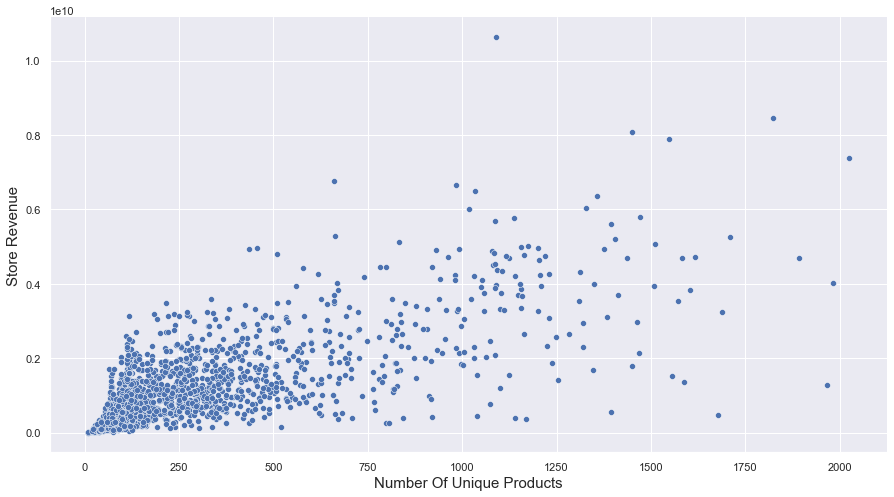

In [14]:

sns.set(rc = {'figure.figsize':(15,8)})
scatter = sns.scatterplot(x = 'tot_num_unique_items',y = 'store_revenue',data = stores_clust_info_combined4) #hue='label'
scatter.set_xlabel('Number Of Unique Products',fontsize=15)
scatter.set_ylabel('Store Revenue',fontsize=15)
sns.despine()

In [15]:
stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,"1,285,899,061.49",1966,7,3133,22.268733031673253,0.324638081247442,3.4135072234315764,9.142660019813247,49.8945997158261,2.508752787533695,12.447109140474687,10.53303542930099,1.3086498563676987,11.20331950207469,43.18544526013406,6.160229811682094,12.065113309926588,15.544206830513884,6.510681586978636,1.2716174974567651,11.291963377416073,52.54323499491353,2.0854526958290944,11.90233977619532,14.39471007121058,94.11764705882352,15.92356687898089,25.313568985176737,46.97589813551614,97.61904761904762,53.669724770642205,62.33480176211453
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,"4,694,029,900.97",1893,7,11239,21.09936289935725,0.1696255613615633,1.976539401268568,10.92030253096754,43.54052191247561,2.4026483805885923,19.89099931398088,12.687961562416586,0.6940119227689296,6.379571136222085,40.5285167719548,6.47744461251001,12.66126879615624,20.571225197971348,5.916534601162176,2.0073956682514527,12.044374009508717,53.61859482303223,2.060221870047544,9.8256735340729,14.527205493924985,82.35294117647058,24.203821656050955,25.997719498289623,46.157344247385176,92.85714285714286,42.6605504587156,60.57268722466961
1401,4129,Cyclone Liquors,626 Lincoln Way,Ames,50010,POINT (-93.618289 42.022865),85,STORY,Cyclone Liquors,"4,028,389,918.1",1983,7,9923,22.306852041865653,0.297399497902889,3.6357689153159134,13.702351636068652,49.16512047706984,1.0891686495604729,9.80333878221658,11.367529980852565,1.279854882595989,12.738083240955357,51.49652322886224,5.280661090396049,6.066713695455003,11.770633880882798,6.101865859808371,2.4710035300050426,17.95259707513868,54.36207766011094,1.9667170953101365,7.261724659606656,9.88401412002017,88.97058823529412,31.210191082802545,40.59293044469784,49.02228285584357,92.85714285714286,33.02752293577982,43.17180616740088
1405,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,Benz Distributing,"8,451,653,814.22",1823,7,13453,26.98651910532016,0.1955763995230026,2.9792234851876493,10.62478420045028,49.54070606696303,0.2039617341045919,9.469229008451288,17.527688991303055,1.4197576748680591,11.016130231175204,52.8506652791199,7.909016576228351,2.244852449267821,7.031888798037612,4.71749862863412,3.2912781130005486,20.899616017553484,55.62260010970928,1.6456390565002743,8.228195282501371,5.595172792100932,63.23529411764706,38.21656050955414,43.44355758266818,46.1118690313779,71.42857142857143,34.403669724770644,22.46696035242291
1856,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619788 41.605706),77,POLK,"Central City Liquor, Inc.","7,370,230,566.75",2025,7,15428,18.839015207529226,0.5137403498720741,3.97409309189574,10.552697507846933,52.08916007254435,1.6330552383665022,12.39823853194518,11.647653616800625,2.2815659839253306,14.551464869069225,44.62665283899403,6.501166709878143,9.197562872698988,11.193933108633653,5.728395061728396,3.950617283950617,22.17283950617284,50.17283950617284,1.925925925925926,7.358024691358024,8.691358024691358,85.29411764705883,50.955414012738856,51

### create outlier data frame

In [16]:
outliers_df = stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

### remove 5 outliers

In [17]:
filt = stores_clust_info_combined4.tot_num_unique_items > 1750

In [18]:
stores_clust_info_combined4 = stores_clust_info_combined4[~filt]

In [19]:
features = ['store_revenue','tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar', 
 'cl_Cheap',
 'cl_High_End',
 'cl_Moderately_High',
 'cl_Most_Variety',
 'cl_Popular_Bottles',
 'cl_Quick_Shots',
 'cl_Volume_For_Dollar',
  'num_unique_clusters'         ]

In [20]:
scaled_features = ['store_revenue_scaled','tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 'cl_Quick_Shots_scaled',
 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled']

In [21]:
stores_clust_info_combined4 = stores_clust_info_combined4.reset_index()


In [22]:
stores_clust_info_combined4.head()

,index,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
0,0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0
1,1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005
2,2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,"24,308,995.32",14,4,14,6.779766330548622,0.0,0.0,0.1961223792773349,86.98117977176855,0.0,6.042931518405508,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,2.2058823529411766,0.0,0.0,0.045475216007276,16.666666666666664,0.0,0.6607929515418502
3,3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,"11,723,322.21",33,5,33,24.31773484454967,0.0,0.0,8.17652311204368,27.538225019919505,2.951211131132085,37.01630589235507,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,3.6764705882352944,0.0,0.0,0.4547521600727603,7.142857142857142,2.064220183486239,1.3215859030837005
4,4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,"6,766,721.37",13,4,13,49.1369431101609,0.0,0.0,6.083004124048927,44.51670514106007,0.2633476247301136,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,3.6764705882352944,0.0,0.0,0.1819008640291041,7.142857142857142,0.2293577981651376,0.0


In [23]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=['index'])

In [24]:
scaler = StandardScaler()

In [25]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

### scale features

In [26]:
stores_clust_info_combined4[scaled_features] = scaler.fit_transform\
                                           (stores_clust_info_combined4[features])


In [27]:
stores_clust_info_combined4[scaled_features].describe()

,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled
count,"1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0","1,925.0"
mean,-3.041722717856143e-16,4.559123641382785e-16,-3.837334490568041e-16,1.0858269550450817e-15,9.458523430572763e-18,9.65432640037029e-16,-8.679925465251224e-17,-3.5356998714101415e-16,4.664522736317979e-15,-2.375271696502585e-15,9.902612640422825e-17,2.3611704222417613e-16,2.1685395182288772e-16,1.3138119740758995e-15,-3.031946987847106e-15
std,1.000259841501072,1.0002598415010715,1.0002598415010728,1.000259841501069,1.0002598415010722,1.0002598415010728,1.0002598415010724,1.000259841501072,1.0002598415010777,1.0002598415010737,1.0002598415010717,1.0002598415010753,1.0002598415010722,1.0002598415010728,1.0002598415010706
min,-1.0209021505356213,-0.8831767555039094,-2.7088945141536414,-0.5567704605715388,-1.0427622845943378,-5.183857836759887,-1.1544175283619036,-1.9706706210413456,-0.43810044669216064,-0.4962548677508225,-0.6762060609228074,-3.378037108882044,-0.8518686283523119,-0.793981224163699,-5.145250637159427
25%,-0.659257856905999,-0.6029906536377758,-0.6883176298167614,-0.5567704605715388,-0.7215953721739656,-0.7089685223293651,-0.8022215247198574,-0.6348712490654459,-0.43810044669216064,-0.4962548677508225,-0.5769715214454803,-0.6131570397473302,-0.6691034944174415,-0.6603318837898688,-0.956813180120883
50%,-0.31980500151827806,-0.45108252611999256,-0.1112154817197646,-0.5022023361948587,-0.3918255872269455,0.11174432107726566,-0.3605454871689411,-0.2039682258474138,-0.43810044669216064,-0.44761976845236345,-0.47153482325082013,0.07806297753634882,-0.4080104459390553,-0.5044076533537338,0.09029618413875301
75%,0.3027485749638378,0.20718602645706824,0.5278120502856232,0.161044880105285,0.39759948562240593,0.8228840264957427,0.6788762001342366,0.4854766113014383,-0.11943679285410685,-0.058538974064690705,0.1300745723304757,0.6310389913632918,0.24472217525691034,0.38658794913846656,1.137405548398389
max,8.727601130398927,4.855574728501236,8.849417256122818,10.719247667911723,6.130693199905121,2.0297245921499103,4.158416868003454,3.286346262218647,10.396463783801668,8.695778899657943,5.116610181066164,2.4282110363008558,5.571020364215989,5.019765082097908,1.137405548398389


### store_revenue is correlated with tot_num_unique_items

In [28]:
stores_clust_info_combined4.store_revenue.corr(stores_clust_info_combined4.tot_num_unique_items)

0.7279811881545474

In [29]:
stores_clust_info_combined4.shape

(1925, 56)

In [30]:
# stores_clust_info_combined4.info()

In [32]:
from sklearn.metrics import silhouette_score

cluster_cols = ['tot_num_unique_items_scaled',       
 'rev_Cheap_scaled',
  
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
#  'cl_Most_Variety_scaled',
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.445715054934167
number of clusters =  3   silhouette score =  0.3884030793874954
number of clusters =  4   silhouette score =  0.4212329441768149
number of clusters =  5   silhouette score =  0.39266177132583363
number of clusters =  6   silhouette score =  0.31378357535259904
number of clusters =  7   silhouette score =  0.3229462175351474
number of clusters =  8   silhouette score =  0.31832107587780184
number of clusters =  9   silhouette score =  0.31187144883263157
number of clusters =  10   silhouette score =  0.3074511718507318


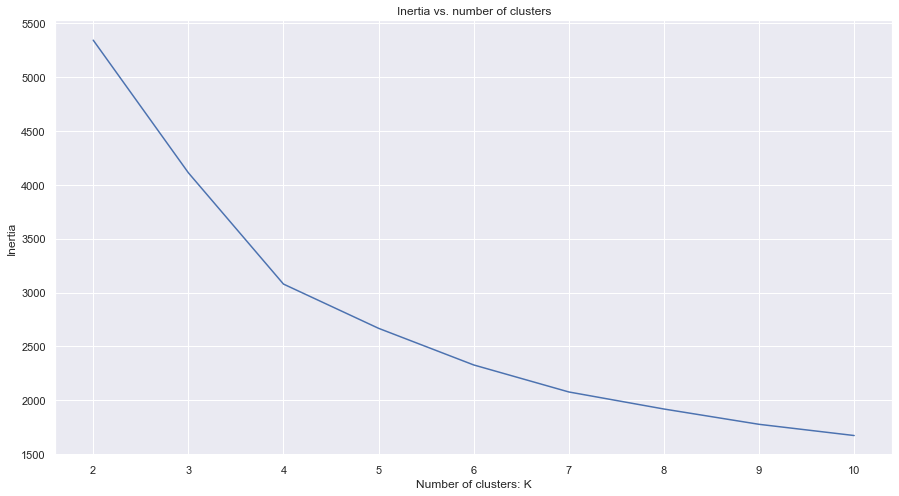

In [33]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]

inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()


In [75]:
# stop

#### Functions to create a polar graph


In [35]:

# # THEN:

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def scale(df, cols, **kwargs):
    df = df.loc[:, cols]
    df = df.to_numpy()
    if 'scaletype' in kwargs and kwargs['scaletype'] == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    scaler.fit(df)
    X = scaler.transform(df)
    dff = pd.DataFrame(X, columns = cols)
    return dff, scaler

def get_kmeans(data, cols, n_clusters = 3, random_state = 42, **kwargs):
    data, scaler = scale(df = data, cols = cols, **kwargs)
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init = 10, tol = 1e-04, random_state = random_state)
    kmeans.fit(data)
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = kmeans.labels_
    polars = clusters.groupby('label').mean().reset_index()
    polars = pd.melt(polars, id_vars = ['label'])
    fig = px.line_polar(polars, r='value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polars, clusters, scaler

def get_clusters(data, cols, cluster_labels):
    data = data[cols]
    clusters = pd.DataFrame(data, columns = cols)
    clusters['label'] = cluster_labels
    polar = clusters.groupby('label').mean().reset_index()
    polar = pd.melt(polar, id_vars = ['label'])
    fig = px.line_polar(polar, r = 'value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
    return fig, polar, clusters, scaler


In [43]:
cols1 = ['tot_num_unique_items', #'rev_Moderately_High',
 'rev_Cheap',
 
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']

In [37]:
stores_clust_info_combined4[cols1].describe().round(2)

,tot_num_unique_items,rev_Cheap,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,"1,925.0","1,925.0","1,925.0","1,925.0","1,925.0"
mean,270.62,17.37,3.27,68.59,8.79
std,296.31,6.41,3.13,13.24,7.61
min,9.0,0.0,0.0,0.0,0.0
25%,92.0,12.96,1.01,59.21,2.68
50%,137.0,16.66,2.04,70.07,6.04
75%,332.0,20.76,4.51,79.48,13.95
max,"1,709.0",74.13,22.47,95.45,40.44


In [76]:

df_scaled = scale(stores_clust_info_combined4, cols1)
fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=4)
fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# plt.figure(figsize = (12,10))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
fig.show()



C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is depreca

In [77]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)



In [79]:
# stores_clust_info_combined4.columns

In [83]:
# stores_clust_info_combined4[product_clusters].head(100)

### four clusters

In [46]:
# 'rev_Moderately_High_scaled',
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
# 'rev_Moderately_High_scaled',

model = KMeans(n_clusters=4, random_state=42)

model.fit(stores_clust_info_combined4[cluster_cols])

stores_clust_info_combined4['label_2'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [47]:
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['mean','median','std'],
                                                    'tot_num_unique_items':['mean','median','std'],
 'rev_Cheap':['mean','median','std'],
 'rev_Moderately_High':['mean','median','std'],
 'rev_Most_Variety':['mean','median','std'],
 'rev_Popular_Bottles':['mean','median','std'],
 'rev_Volume_For_Dollar':['mean','median','std'],})

Store_Number         store_revenue                    \
               count                  mean            median   
label_2                                                        
0                948   668,195,590.9673734    561,220,553.91   
1                220 2,739,458,119.8067274 2,651,936,086.995   
2                445 1,444,805,419.7886965  1,286,892,670.95   
3                312   854,404,144.2644231    672,143,895.24   

                              tot_num_unique_items                            \
                          std                 mean median                std   
label_2                                                                        
0         489,971,168.2570529   106.45886075949367   98.0 52.248405497713044   
1       1,765,192,154.6861331     902.959090909091  932.5 362.86192848068566   
2         885,154,860.0913365    326.0943820224719  291.0 172.18105411541404   
3         784,925,472.1133611   244.44551282051282  213.5 172.39520395405424   

                 rev_Cheap                                        \
                      mean             median                std   
label_2                                                            
0       14.091354250125354 14.063592550320823 3.8212797449813554   
1       21.853614744826523 21.693049384904068 3.6657778711067532   
2       15.632493371549286   16.0870746272151 3.8387611611016896   
3       26.667345779127455  25.09081561721031  6.449571383826361   

        rev_Moderately_High                                         \
                       mean             median                 std   
label_2                                                              
0       0.07594602790258725                0.0 0.27546074245017343   
1        2.0031479950921143 1.8340714075588127  1.2708182651267368   
2        0.6312943654015093 0.3844450565617164  0.8305365215541449   
3        1.5560096531099121 1.1183220395804387   1.827626858883253   

          rev_Most_Variety                                        \
                      mean             median                std   
label_2                                                            
0       1.2417556864927604 1.0498539822113346 0.8172394619102069   
1        9.768137261014394   9.42214033781018 2.8643278708087645   
2        4.501137272795289 4.2394362831657535 1.8205796553493827   
3        3.071190840523762 2.8208236954568684 1.8881799234143029   

        rev_Popular_Bottles                                       \
                       mean            median                std   
label_2                                                            
0         79.63447164401397 79.56802176783323  5.260541822366411   
1         48.30139080966391 48.00515219513663   7.24994268046655   
2        60.583074152604425 61.78331382899084 7.6220208376707665   
3         60.77030046957312 61.94975041539395  7.962422683939137   

        rev_Volume_For_Dollar                                        
                         mean             median                std  
label_2                                                              
0           4.003328986957108 3.1785547624731176 3.0932960210273563  
1           16.72694720894068 16.780820043862406 5.8768897663549655  
2          17.832179674134725  17.36041481669092  5.644432802749166  
3           4.824770497585947  4.470441955151722 3.5406773154079882

In [48]:

stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,948,"561,220,553.91",98.0,14.063592550320823,0.0,1.0498539822113346,79.56802176783323,3.1785547624731176
1,220,"2,651,936,086.995",932.5,21.693049384904068,1.8340714075588127,9.42214033781018,48.00515219513663,16.780820043862406
2,445,"1,286,892,670.95",291.0,16.0870746272151,0.3844450565617164,4.2394362831657535,61.78331382899084,17.36041481669092
3,312,"672,143,895.24",213.5,25.09081561721031,1.1183220395804387,2.8208236954568684,61.94975041539395,4.470441955151722


In [49]:
# 4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,948,"561,220,553.91",98.0,14.063592550320823,0.0,1.0498539822113346,79.56802176783323,3.1785547624731176
1,220,"2,651,936,086.995",932.5,21.693049384904068,1.8340714075588127,9.42214033781018,48.00515219513663,16.780820043862406
2,445,"1,286,892,670.95",291.0,16.0870746272151,0.3844450565617164,4.2394362831657535,61.78331382899084,17.36041481669092
3,312,"672,143,895.24",213.5,25.09081561721031,1.1183220395804387,2.8208236954568684,61.94975041539395,4.470441955151722


In [52]:

stores_clust_info_combined4['mod_high_lt_1_pct'] = stores_clust_info_combined4.rev_Moderately_High < 1
stores_clust_info_combined4['mod_high_lt_1_pct'].value_counts(normalize=True).round(2)

True    0.78
False   0.22
Name: mod_high_lt_1_pct, dtype: float64

In [54]:
# [s+100 if s<2000 else s for s in salaries]

stores_clust_info_combined4['liquor_or_spirit_or_beer_store'] = [True if ('liquor' in store or 'spirit' in store or 'beer' in store) else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]

stores_clust_info_combined4.liquor_or_spirit_or_beer_store.value_counts()

False    1689
True      236
Name: liquor_or_spirit_or_beer_store, dtype: int64

In [55]:
stores_clust_info_combined4['csv_or_walgreens'] =[True if ('cvs' in store or 'walgreens' in store ) else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['csv_or_walgreens'].value_counts()

False    1837
True       88
Name: csv_or_walgreens, dtype: int64

In [56]:
stores_clust_info_combined4['wal_mart'] =[True if 'wal-mart' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['wal_mart'].value_counts()

False    1865
True       60
Name: wal_mart, dtype: int64

In [57]:
stores_clust_info_combined4['target'] =[True if 'target' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['target'].value_counts()

False    1905
True       20
Name: target, dtype: int64

In [58]:
stores_clust_info_combined4['fareway'] =[True if 'fareway' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['fareway'].value_counts()

False    1818
True      107
Name: fareway, dtype: int64

In [59]:
stores_clust_info_combined4['hy_vee'] =[True if 'hy-vee' in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['hy_vee'].value_counts()

False    1745
True      180
Name: hy_vee, dtype: int64

In [60]:
# Sam's Club 
stores_clust_info_combined4['sams_club'] = [True if "sam's club" in store  else False  for store in stores_clust_info_combined4.Store_Name.str.lower()]
stores_clust_info_combined4['sams_club'].value_counts()

False    1916
True        9
Name: sams_club, dtype: int64

In [84]:
store_type = []
for store in stores_clust_info_combined4.Store_Name.str.lower():
    if ('liquor' in store or 'spirit' in store or 'beer' in store):
        store_type.append('Liquor')
    elif ('cvs' in store or 'walgreens' in store ):
        store_type.append('CVS or Walgreens')
    elif 'wal-mart' in store:
         store_type.append('Wal-Mart')
    elif 'target' in store:
        store_type.append('Target')
    elif 'fareway' in store:
         store_type.append('Fareway Stores')
    elif 'hy-vee' in store:
        store_type.append('Hy-Vee')
    elif "sam's club" in store:
        store_type.append("Sam's Club")
    elif "casey's general store" in store:
        store_type.append("Casey's General Store")
    elif 'kum & go' in store:
        store_type.append('Kum & Go')
    elif 'yesway' in store:
        store_type.append('Yesway')
    elif 'tobacco' in store:
        store_type.append('Tobacco Store')
    else:
        store_type.append('Other')
        
        
        
print('len(store_type) = ',len(store_type))        
stores_clust_info_combined4.shape

len(store_type) =  1925


(1925, 66)

In [85]:
stores_clust_info_combined4['store_type'] = store_type
stores_clust_info_combined4['store_type'].value_counts(normalize=True).round(2)

Other                   0.31
Casey's General Store   0.26
Liquor                  0.12
Hy-Vee                  0.08
Fareway Stores          0.06
Kum & Go                0.05
CVS or Walgreens        0.05
Wal-Mart                0.03
Target                  0.01
Yesway                  0.01
Tobacco Store           0.01
Sam's Club               0.0
Name: store_type, dtype: float64

In [86]:
# 4 clusters
cols = ['Store_Name',  'City', 'Zip_Code',
        'County','store_type', 
         'mod_high_lt_1_pct',
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar','liquor_or_spirit_or_beer_store', 'csv_or_walgreens', 'wal_mart', 'target', 'fareway', 'hy_vee','sams_club']


### label_2 = 0 

### convenience stores

In [64]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

False   0.98
True    0.02
Name: liquor_or_spirit_or_beer_store, dtype: float64

In [91]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols]['mod_high_lt_1_pct'].value_counts(normalize=True).round(2)

True    0.98
False   0.02
Name: mod_high_lt_1_pct, dtype: float64

In [92]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols]['store_type'].value_counts(normalize=True).round(2)

Casey's General Store   0.53
Other                   0.25
Kum & Go                 0.1
CVS or Walgreens        0.05
Hy-Vee                  0.03
Yesway                  0.02
Liquor                  0.02
Fareway Stores           0.0
Tobacco Store            0.0
Target                   0.0
Name: store_type, dtype: float64

In [66]:
# 4 clusters
cols = ['Store_Name',  'City', 'Zip_Code',
        'County','store_type', 
         'mod_high_lt_1_pct',
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar','liquor_or_spirit_or_beer_store', 'csv_or_walgreens', 'wal_mart', 'target', 'fareway', 'hy_vee','sams_club']

#convenience stores

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols].sample(n=100) #convenience stores

,Store_Name,City,Zip_Code,County,store_type,mod_high_lt_1_pct,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club
358,New Star / Fort Dodge,Fort Dodge,50501,WEBSTER,Other,True,"359,832,517.88",145,6,301,19.77307512650308,0.0,0.320531411889972,1.0253911741324249,75.69869766768507,1.7101709195865966,33.088235294117645,0.0,0.1140250855188141,0.9549795361527968,52.38095238095239,10.091743119266056,2.643171806167401,False,False,False,False,False,False,False
1027,Casey's General Store # 2169/ Independence,Independence,50644,BUCHANAN,Casey's General Store,True,"476,020,652.89",99,5,289,15.185539194809705,0.0,0.0,0.8139063476506968,80.47296806647594,2.5789233398738305,27.94117647058824,0.0,0.0,0.6821282401091405,64.28571428571429,2.981651376146789,1.3215859030837005,False,False,False,False,False,False,False
315,Casey's General Store #1045 / Delmar,Delmar,52037,CLINTON,Casey's General Store,True,"501,206,163.28",103,6,322,17.71802706671616,0.0,0.0643663273988461,0.8468941347851496,78.58877133159902,2.399252579278857,27.94117647058824,0.0,0.1140250855188141,0.8185538881309686,61.90476190476191,2.981651376146789,1.5418502202643172,False,False,False,False,False,False,False
1698,Casey's #2654 / Stuart,Stuart,50250,Adair,Other,True,"1,148,688,767.82",138,5,831,19.79889117150644,0.0,0.0,1.2403704205308872,76.6979482459827,1.325202659453998,33.82352941176471,0.0,0.0,1.409731696225557,78.57142857142857,5.504587155963304,0.881057268722467,False,False,False,False,False,False,False
1754,Casey's General Store #2760 / Marion,Marion,52302,LINN,Casey's General Store,True,"927,354,780.07",117,6,583,10.938335568005932,0.0,0.0030424278395233,0.965789503918225,86.01078604132417,1.884212960942634,29.411764705882355,0.0,0.1140250855188141,1.182355616189177,76.19047619047619,2.293577981651376,1.762114537444934,False,False,False,False,False,False,False
480,Kum & Go #246 / Winterset,Winterset,50273,MADISON,Kum & Go,True,"1,100,308,935.98",120,6,798,16.10056414494303,0.0,0.0111449535662254,1.1271943346487043,74.78471008209252,6.581293059799004,31.61764705882353,0.0,0.2280501710376282,1.1368804001819008,59.523809523809526,3.669724770642202,1.9823788546255507,False,False,False,False,False,False,False
1109,Kum & Go #508 / Cedar Rapids,Cedar Rapids,52404,LINN,Kum & Go,True,"2,176,505,472.58",118,6,1496,16.22912149911981,0.0,0.0397630288966888,0.6934146042881254,76.51101348695512,4.786060311464305,32.35294117647059,0.0,0.1140250855188141,1.0459299681673488,57.14285714285714,4.357798165137615,1.5418502202643172,False,False,False,False,False,False,False
543,Walgreens #07454 / Ankeny,Ankeny,50021,POLK,CVS or Walgreens,True,"812,680,201.37",79,4,477,16.08193850910573,0.0,0.0,0.9980475624146804,70.40098023127752,12.519033697202078,24.264705882352946,0.0,0.0,0.5457025920873124,45.23809523809524,0.0,3.303964757709251,False,True,False,False,False,False,False
814,Casey's General Store #1729 / Arlington,Aplington,50604,BUTLER,Casey's General Store,True,"466,334,685.79",53,5,227,8.201987565047686,0.0,0.0,1.0294470873139894,89.5718076604966,1.165798375214186,16.176470588235293,0.0,0.0,0.3183265120509322,47.61904761904761,0.4587155963302752,0.4405286343612335,False,False,False,False,False,False,False
1269,KUM & GO #92 / ANKENY,Ankeny,50021,POLK,Kum & Go,True,"1,922,445,223.13",137,5,1402,18.5335008177711,0.0,0.0,1.3300665721111635,73.52852311227662,4.748674130822125,35.294117647058826,0.0,0.0,1.182355616189177,66.66666666666666,4.81651376146789,3.0837004405286343,False,False,False,False,False,False,False


In [67]:
cols2 = ['Store_Name',  'City', 'Zip_Code',
        'County', 
        'tot_num_unique_items', 'num_unique_clusters',
        'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar']

cols3=['cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Volume_For_Dollar']

In [68]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,948.0,948.0,948.0,948.0,948.0,948.0,948.0,948.0
mean,106.46,5.33,14.09,0.0,0.08,1.24,79.63,4.0
std,52.25,0.74,3.82,0.04,0.28,0.82,5.26,3.09
min,9.0,2.0,0.67,0.0,0.0,0.0,64.54,0.0
25%,77.0,5.0,11.45,0.0,0.0,0.75,75.79,1.9
50%,98.0,5.0,14.06,0.0,0.0,1.05,79.57,3.18
75%,122.0,6.0,16.97,0.0,0.01,1.49,83.47,5.27
max,508.0,7.0,23.49,0.91,4.82,6.2,95.45,16.33


In [87]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,948.0,948.0,948.0,948.0,948.0,948.0
mean,24.77,0.14,0.22,1.08,56.58,1.83
std,8.46,0.73,0.8,1.08,13.46,1.77
min,1.47,0.0,0.0,0.0,9.52,0.0
25%,19.85,0.0,0.0,0.5,50.0,0.88
50%,25.74,0.0,0.0,0.82,59.52,1.32
75%,30.88,0.0,0.11,1.18,66.67,2.2
max,63.97,10.19,12.54,8.69,90.48,14.54


In [88]:
# 4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,948,"561,220,553.91",98.0,14.063592550320823,0.0,1.0498539822113346,79.56802176783323,3.1785547624731176
1,220,"2,651,936,086.995",932.5,21.693049384904068,1.8340714075588127,9.42214033781018,48.00515219513663,16.780820043862406
2,445,"1,286,892,670.95",291.0,16.0870746272151,0.3844450565617164,4.2394362831657535,61.78331382899084,17.36041481669092
3,312,"672,143,895.24",213.5,25.09081561721031,1.1183220395804387,2.8208236954568684,61.94975041539395,4.470441955151722


In [ ]:
# stores_clust_info_combined4.liquor_or_spirit_or_beer_store.value_counts()

### label_2 = 1

### large supermarkets and liquor stores 

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['csv_or_walgreens']].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['wal_mart']].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['fareway']].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['hy_vee']].value_counts(normalize=True).round(2)

In [ ]:

# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['sams_club']].value_counts(normalize=True).round(2)

### store_type  large cluster

In [70]:

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['store_type']].value_counts(normalize=True).round(2)

store_type    
Hy-Vee           0.35
Liquor           0.34
Other            0.14
Fareway Stores   0.12
Sam's Club       0.04
Tobacco Store     0.0
dtype: float64

In [72]:

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols][['mod_high_lt_1_pct']].value_counts(normalize=True).round(2)

mod_high_lt_1_pct
False               0.79
True                0.21
dtype: float64

In [73]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols].sample(n=100) #larger supermarkets and liquor stores

,Store_Name,City,Zip_Code,County,store_type,mod_high_lt_1_pct,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club
1144,Hy-Vee Wine and Spirits / Bettendorf,Bettendorf,52722,SCOTT,Liquor,False,"5,805,310,430.44",1472,7,12265,20.057185493037423,0.0937204918701932,2.2966629653583346,11.594995314643011,46.301143863314046,18.46911195115428,69.11764705882352,21.019108280254777,24.62941847206385,32.56025466120964,83.33333333333334,35.321100917431195,49.33920704845815,True,False,False,False,False,True,False
1535,Hy-Vee Food Store #2 / Des Moines,Des Moines,50317,POLK,Hy-Vee,True,"3,471,311,530.28",661,7,5318,18.22042098016432,0.0001555608003746,0.1502166663670026,9.25940146040634,50.64727557967659,20.764519255402565,59.55882352941176,0.6369426751592357,2.0524515393386547,15.006821282401091,85.71428571428571,16.743119266055047,26.87224669603524,False,False,False,False,False,True,False
845,West D Liquors,West Des Moines,50265,POLK,Liquor,False,"1,876,208,787.32",1239,7,3574,19.44269646349244,0.36405155365233,4.117546421384703,9.729689227751445,50.3511461658492,13.935914377284336,63.97058823529412,11.464968152866245,19.84036488027366,28.6493860845839,73.80952380952381,37.84403669724771,29.51541850220265,True,False,False,False,False,False,False
1800,Hy-Vee #2 / Dubuque,Dubuque,52002,DUBUQUE,Hy-Vee,False,"3,943,332,349.21",1209,7,7457,21.72605486579481,0.030684551360283,1.779582652323452,10.169620853802495,47.53754158625627,17.361646202789807,82.35294117647058,5.7324840764331215,10.946408209806158,28.831286948613005,95.23809523809524,34.403669724770644,37.00440528634361,False,False,False,False,False,True,False
1354,Fareway Stores #909 / Ankeny,Ankeny,50021,POLK,Fareway Stores,False,"2,006,477,161.85",690,7,3466,22.07585274489727,0.1566129049334736,1.999076440671624,12.119652455739214,46.02219824513673,17.063802129914087,41.91176470588236,14.012738853503183,12.656784492588368,15.006821282401091,61.90476190476191,7.568807339449542,24.44933920704846,False,False,False,False,True,False,False
1843,Eldridge Mart,Eldridge,52748,SCOTT,Other,False,"1,463,652,031.2",877,7,2159,16.68546352576537,0.1193383511084898,2.618283538921515,6.467754420590456,61.64344397214949,11.280476821709753,66.91176470588235,10.191082802547772,10.832383124287343,18.37198726693952,83.33333333333334,22.47706422018349,30.396475770925107,False,False,False,False,False,False,False
1597,Hy-Vee Food Store #3 / Waterloo,Waterloo,50702,BLACK HAWK,Hy-Vee,False,"3,834,146,561.84",1604,7,9485,17.526512490631347,0.2450843054233808,2.328703206565788,13.153864775267454,44.545390782880375,20.237713670434808,64.70588235294117,22.29299363057325,21.436716077537056,38.29013187812642,80.95238095238095,43.80733944954128,49.77973568281938,False,False,False,False,False,True,False
1141,Hy-Vee Wine and Spirits / Harlan,Harlan,51537,SHELBY,Liquor,True,"2,790,442,522.66",906,7,4275,23.128034720987348,0.0071876234099532,0.8002278931986005,9.299024085349943,50.742806951645846,15.30721465543136,66.91176470588235,4.45859872611465,9.35005701254276,21.600727603456114,83.33333333333334,17.201834862385322,31.05726872246696,True,False,False,False,False,True,False
1310,Colfax-Travel Center,Colfax,50054,JASPER,Other,False,"163,470,097.07",337,6,344,25.6809021909514,0.0,3.026717135844912,11.713162152097324,46.85337471060695,10.170495679635312,44.11764705882353,0.0,1.9384264538198404,7.0031832651205095,59.523809523809526,11.238532110091745,7.048458149779736,False,False,False,False,False,False,False
1864,Fareway Stores #384 / Boone,Boone,50036,BOONE,Fareway Stores,True,"2,295,396,565.64",515,7,2814,21.18218244325176,0.0039761809077444,0.7848070577284861,9.660805362326176,52.96931415600496,15.313682667

In [74]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,220.0,220.0,220.0,220.0,220.0,220.0,220.0,220.0
mean,902.96,6.9,21.85,0.13,2.0,9.77,48.3,16.73
std,362.86,0.3,3.67,0.16,1.27,2.86,7.25,5.88
min,126.0,6.0,15.21,0.0,0.01,3.87,30.88,1.52
25%,657.25,7.0,19.26,0.02,1.16,7.93,43.71,12.5
50%,932.5,7.0,21.69,0.08,1.83,9.42,48.01,16.78
75%,"1,142.75",7.0,24.02,0.17,2.6,11.21,53.41,20.39
max,"1,709.0",7.0,33.58,1.0,7.65,22.47,67.24,35.08


In [89]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,220.0,220.0,220.0,220.0,220.0,220.0
mean,61.21,8.76,11.85,20.93,74.94,27.19
std,16.42,7.06,7.35,9.36,17.34,11.1
min,16.91,0.0,0.34,2.77,26.19,4.41
25%,51.29,3.66,6.96,13.82,64.29,17.18
50%,63.97,7.32,10.72,21.49,80.95,27.53
75%,74.26,12.1,15.99,27.72,88.1,35.35
max,89.71,43.31,43.1,42.47,100.0,57.49


In [90]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,948,"561,220,553.91",98.0,14.063592550320823,0.0,1.0498539822113346,79.56802176783323,3.1785547624731176
1,220,"2,651,936,086.995",932.5,21.693049384904068,1.8340714075588127,9.42214033781018,48.00515219513663,16.780820043862406
2,445,"1,286,892,670.95",291.0,16.0870746272151,0.3844450565617164,4.2394362831657535,61.78331382899084,17.36041481669092
3,312,"672,143,895.24",213.5,25.09081561721031,1.1183220395804387,2.8208236954568684,61.94975041539395,4.470441955151722


### label_2 == 2

### drug stores, Walmart, Walgreens, CVS, Target,  medium size grocery stores and liquor stores, don't carry high end

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['csv_or_walgreens'].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['wal_mart'].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['target'].value_counts(normalize=True).round(2)

In [97]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['fareway'].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['hy_vee'].value_counts(normalize=True).round(2)

In [95]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['sams_club'].value_counts(normalize=True).round(2)

### store type for medium cluster

In [96]:

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['store_type'].value_counts(normalize=True).round(2)

Other                   0.33
Fareway Stores          0.17
Liquor                  0.15
Wal-Mart                0.13
Hy-Vee                  0.09
CVS or Walgreens        0.07
Target                  0.04
Tobacco Store           0.01
Casey's General Store    0.0
Sam's Club               0.0
Name: store_type, dtype: float64

In [98]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols]['mod_high_lt_1_pct'].value_counts(normalize=True).round(2)

True    0.81
False   0.19
Name: mod_high_lt_1_pct, dtype: float64

In [99]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,store_type,mod_high_lt_1_pct,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club
1372,Wal-Mart 3762 / WDM,West Des Moines,50266,POLK,Wal-Mart,True,"3,947,486,908.99",561,7,4182,14.948726783516609,0.0034739104438242,0.8461135514834612,6.156950105559316,57.34462265231883,20.333668473529404,47.794117647058826,0.6369426751592357,3.648802736602053,12.59663483401546,73.80952380952381,6.8807339449541285,27.53303964757709,False,False,True,False,False,False,False
113,CVS Pharmacy #4816 / Council Bluffs,Council Bluffs,51503,POTTAWATTA,CVS or Walgreens,True,"269,837,917.38",109,6,218,16.44695647331934,0.0,0.129226160424645,2.845418492163728,58.35281017169257,22.2051257146417,15.441176470588236,0.0,0.2280501710376282,1.5006821282401093,38.095238095238095,0.2293577981651376,7.929515418502203,False,True,False,False,False,False,False
1493,Fareway Stores #426 / Nevada,Nevada,50201,STORY,Fareway Stores,True,"1,508,995,013.04",349,7,1818,21.43056051116504,0.0030408370871656,0.1353420622567599,7.896751106548641,50.01504777206272,20.26667833804785,47.05882352941176,0.6369426751592357,2.0524515393386547,7.276034561164166,61.90476190476191,3.89908256880734,13.876651982378856,False,False,False,False,True,False,False
1768,Hy-Vee Store / Perry,Perry,50220,DALLAS,Hy-Vee,True,"2,201,576,343.5",457,7,2417,16.085912445216096,0.0155751192100325,0.3423832869686719,8.003931444860205,61.10427390863723,14.399411476506902,36.76470588235294,3.1847133757961785,3.648802736602053,11.36880400181901,64.28571428571429,2.064220183486239,18.50220264317181,False,False,False,False,False,True,False
32,The Liquor Store,Paullina,51046,OBRIEN,Liquor,True,"250,236,535.52",85,5,157,7.904855611469665,0.0,0.0,1.8265312299429168,70.46735515002625,19.789892410032195,11.76470588235294,0.0,0.0,1.227830832196453,28.57142857142857,0.2293577981651376,6.387665198237885,True,False,False,False,False,False,False
1253,Fareway Stores #849 / Emmetsburg,Emmetsburg,50536,PALO ALTO,Fareway Stores,True,"724,543,631.89",177,7,793,13.79701567167686,0.000322829419382,0.060253307155735,4.198276551082586,56.772554083043794,23.852186016623136,24.264705882352946,0.6369426751592357,0.5701254275940707,2.364711232378354,45.23809523809524,4.357798165137615,10.572687224669604,False,False,False,False,True,False,False
696,Fredricksburg Food Center,Fredericksburg,50630,CHICKASAW,Other,True,"607,401,737.86",129,6,435,16.630239759584345,0.0,0.0207221073228162,2.4825430748891866,68.24396746713649,12.557554098994128,22.794117647058822,0.0,0.2280501710376282,2.592087312414734,40.47619047619048,0.9174311926605504,3.9647577092511015,False,False,False,False,False,False,False
1892,Quillins Food Ranch / Waukon,Waukon,52172,ALLAMAKEE,Other,True,"3,044,353,126.13",345,7,2671,17.28641710066612,0.0214642409381288,0.1124682163383759,3.284139657513917,61.1755772083344,17.788616368838245,43.38235294117647,5.095541401273886,1.4823261117445838,6.684856753069577,64.28571428571429,5.275229357798166,14.977973568281936,False,False,False,False,False,False,False
1569,Hy-Vee Food Store #1 / Waterloo,Waterloo,50702,BLACK HAWK,Hy-Vee,True,"1,973,757,121.18",269,6,1816,16.130318638174803,0.0,0.0617218373490494,3.366863299789946,62.00557690595356,18.276538913477705,31.61764705882353,0.0,0.1140250855188141,6.2755798090040935,50.0,3.440366972477064,11.233480176211454,False,False,False,False,False,True,False
139,CVS Pharmacy #8443 / Cedar Rapids,Cedar Rapids,52404,LINN,CVS or Walgreens,True,"272,052,827.68",103,5,200,13.733342317598218,0.0,0.5039773384060273,1.876622942513648,61.642827641276,22.243229760206106,19.11764705882353,0.0,0.2280501710376282,0.7276034561164165,35.714285714285715,0.0,9.6916

In [100]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,445.0,445.0,445.0,445.0,445.0,445.0,445.0,445.0
mean,326.09,6.45,15.63,0.03,0.63,4.5,60.58,17.83
std,172.18,0.77,3.84,0.08,0.83,1.82,7.62,5.64
min,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,211.0,6.0,12.94,0.0,0.13,3.13,56.49,13.66
50%,291.0,7.0,16.09,0.0,0.38,4.24,61.78,17.36
75%,425.0,7.0,17.96,0.02,0.83,5.8,66.09,21.5
max,956.0,7.0,29.16,0.72,6.92,9.85,73.02,40.44


In [101]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,445.0,445.0,445.0,445.0,445.0,445.0
mean,36.61,1.66,2.34,6.41,55.84,13.37
std,14.27,2.68,2.81,4.09,16.64,6.27
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,27.21,0.0,0.46,3.5,42.86,9.03
50%,34.56,0.64,1.37,5.55,54.76,13.0
75%,45.59,1.91,3.31,9.0,69.05,17.4
max,75.0,16.56,19.27,21.06,97.62,35.46


In [102]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],

                                                      'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,948,"561,220,553.91",98.0,14.063592550320823,0.0,1.0498539822113346,79.56802176783323,3.1785547624731176
1,220,"2,651,936,086.995",932.5,21.693049384904068,1.8340714075588127,9.42214033781018,48.00515219513663,16.780820043862406
2,445,"1,286,892,670.95",291.0,16.0870746272151,0.3844450565617164,4.2394362831657535,61.78331382899084,17.36041481669092
3,312,"672,143,895.24",213.5,25.09081561721031,1.1183220395804387,2.8208236954568684,61.94975041539395,4.470441955151722


In [ ]:
cl_Cheap cl_High_End cl_Moderately_High cl_Most_Variety cl_Popular_Bottles cl_Volume_For_Dollar

In [109]:
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],'cl_Cheap':'median',
                                                      'cl_High_End':'median', 'cl_Moderately_High':'median','cl_Most_Variety':'median',
                                                      'cl_Popular_Bottles':'median', 'cl_Volume_For_Dollar':'median'})
                                                      

,Store_Number,store_revenue,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,948,"561,220,553.91",25.73529411764705,0.0,0.0,0.8185538881309686,59.523809523809526,1.3215859030837005
1,220,"2,651,936,086.995",63.97058823529412,7.32484076433121,10.718358038768528,21.487039563437925,80.95238095238095,27.533039647577095
2,445,"1,286,892,670.95",34.55882352941176,0.6369426751592357,1.3683010262257698,5.547976352887677,54.761904761904766,12.995594713656388
3,312,"672,143,895.24",38.23529411764706,0.6369426751592357,0.9122006841505133,2.2737608003638017,57.14285714285714,3.1938325991189425


### label_2 == 3

### smaller sized supermarkets and liquor stores that carry more high end products

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['liquor_or_spirit_or_beer_store'].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['csv_or_walgreens'].value_counts(normalize=True).round(4)

In [ ]:
# ['wal_mart']
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['wal_mart'].value_counts(normalize=True).round(2)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['fareway'].value_counts(normalize=True).round(4)

In [ ]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['hy_vee'].value_counts(normalize=True).round(2)

In [103]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['store_type'].value_counts(normalize=True).round(2)

Other                   0.62
Liquor                  0.26
Hy-Vee                  0.04
CVS or Walgreens        0.04
Kum & Go                0.02
Tobacco Store           0.02
Casey's General Store   0.01
Name: store_type, dtype: float64

In [105]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols]['mod_high_lt_1_pct'].value_counts(normalize=True).round(2)

False   0.51
True    0.49
Name: mod_high_lt_1_pct, dtype: float64

In [107]:
#  4 Clusters smaller sized supermarkets and liquor stores that carry more high end products
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols].sample(n=200) 

,Store_Name,City,Zip_Code,County,store_type,mod_high_lt_1_pct,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club
300,Walgreens #11942 / Dubuque,Dubuque,52001,DUBUQUE,CVS or Walgreens,True,"615,797,573.69",120,5,443,20.642670401944823,0.0,0.0,4.476338411797096,64.04637443221621,10.400711213623945,27.94117647058824,0.0,0.0,1.8190086402910413,45.23809523809524,0.4587155963302752,4.625550660792952,False,True,False,False,False,False,False
1353,W-Mart,Davenport,52803,SCOTT,Other,False,"1,208,298,147.86",307,7,1490,30.143428424107853,0.0305499930339022,2.8663693461204343,2.9157787092860867,55.55157538053036,4.676347240130578,53.67647058823529,1.2738853503184715,1.4823261117445838,3.0923146884947705,64.28571428571429,21.788990825688074,6.387665198237885,False,False,False,False,False,False,False
1,Dyno's #53 / Sibley,Sibley,51249,OSCEOLA,Other,True,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,10.597907049228484,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,False,False,False,False,False,False,False
141,Kwik Star #1146 / Cedar Rapids,Cedar Rapids,52404,LINN,Other,True,"91,051,643.02",99,6,99,29.633542366800885,0.0,0.7167079234986,3.133361799273988,58.3398354803241,5.005794743318186,25.0,0.0,0.1140250855188141,0.6821282401091405,42.85714285714285,6.192660550458716,0.881057268722467,False,False,False,False,False,False,False
1715,Ehlinger's Vinton Express,Vinton,52349,BENTON,Other,True,"2,909,873,413.21",420,7,2541,23.17346319495499,0.0062504533418641,0.1192164072928915,4.511553276648524,66.26192384853582,5.165143559774267,45.588235294117645,0.6369426751592357,1.3683010262257698,9.50432014552069,69.04761904761905,12.844036697247708,11.233480176211454,False,False,False,False,False,False,False
888,Fast Ave One Stop / Muscatine,Muscatine,52761,MUSCATINE,Other,False,"779,183,971.36",284,7,941,20.2095715297056,0.0550478982840661,1.137139994619614,1.646631545513675,63.50518645504597,10.101891977142992,46.32352941176471,4.45859872611465,3.534777651083238,2.501136880400182,69.04761904761905,16.055045871559635,6.387665198237885,False,False,False,False,False,False,False
735,Hy-Vee Fast and Fresh - Windsor Heights,Windsor Heights,50324,Polk,Hy-Vee,True,"150,946,390.9",47,5,349,21.648721188470628,0.0,0.1772607866969544,0.6655113076969899,60.46708951157838,0.0,9.558823529411764,0.0,0.3420752565564424,0.090950432014552,16.666666666666664,5.045871559633028,0.0,False,False,False,False,False,True,False
1918,Hy-Vee Food Store / Bedford,Bedford,50833,TAYLOR,Hy-Vee,True,"1,371,735,972.55",182,7,1194,18.73460176321451,0.0001219739099565,0.0456632910803954,4.594594744266846,68.73250675108572,7.842901932505714,26.47058823529412,0.6369426751592357,0.3420752565564424,3.910868576625739,64.28571428571429,0.6880733944954129,5.726872246696035,False,False,False,False,False,True,False
1300,Corner Stop / Washington,Washington,52353,WASHINGTON,Other,False,"300,598,307.06",275,7,404,20.79887570940999,0.4489300133452322,2.545409298819755,1.956245704612785,66.00579424434234,5.68146767260107,38.23529411764706,9.554140127388536,6.955530216647662,2.364711232378354,61.90476190476191,11.926605504587156,3.744493392070485,False,False,False,False,False,False,False
921,Prime Mart / Waterloo,Waterloo,50703,BLACK HAWK,Other,False,"293,252,085.12",166,7,438,39.952101821222335,0.3177562572551505,7.413257696395949,3.8967229560614833,40.04599971452711,2.722523704045607,33.82352941176471,1.910828025477707,1.2542759407069557,1.3187812642110048,52.38095238095239,11.238532110091745,1.3215859030837005,False,False,False,False,False,False,False


In [110]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,312.0,312.0,312.0,312.0,312.0,312.0,312.0,312.0
mean,244.45,6.22,26.67,0.09,1.56,3.07,60.77,4.82
std,172.4,0.93,6.45,0.2,1.83,1.89,7.96,3.54
min,9.0,3.0,18.32,0.0,0.0,0.0,0.0,0.0
25%,103.0,6.0,22.62,0.0,0.05,1.74,57.16,1.95
50%,213.5,6.0,25.09,0.0,1.12,2.82,61.95,4.47
75%,347.0,7.0,29.55,0.14,2.47,4.12,66.03,7.62
max,793.0,7.0,74.13,2.77,13.46,12.42,73.84,15.84


In [ ]:
# features_for_graph = ['tot_num_unique_items',
#  'rev_Cheap',
#  'rev_Most_Variety',
#  'rev_Popular_Bottles',
#  'rev_Volume_For_Dollar',
# 'rev_Moderately_High']

### label_2 = 0 

### convenience stores


### label_2 = 1
### Large =  large supermarkets and liquor stores with the most variety of products, carry more high end products 


### label_2 == 2
### Medium =  drug stores, Walmart, medium size grocery stores and liquor stores, don't carry high end


### label_2 == 3
### Smaller = smaller sized supermarkets and liquor stores that carry more high end products


In [111]:
clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}


stores_clust_info_combined4['Store_Cluster'] = stores_clust_info_combined4['label_2'].map(clust_dict)


In [112]:
convenience = stores_clust_info_combined4.loc[stores_clust_info_combined4['Store_Cluster'] == 'Convenience']['store_type'].value_counts(normalize=True)

<AxesSubplot:ylabel='Store_Type'>

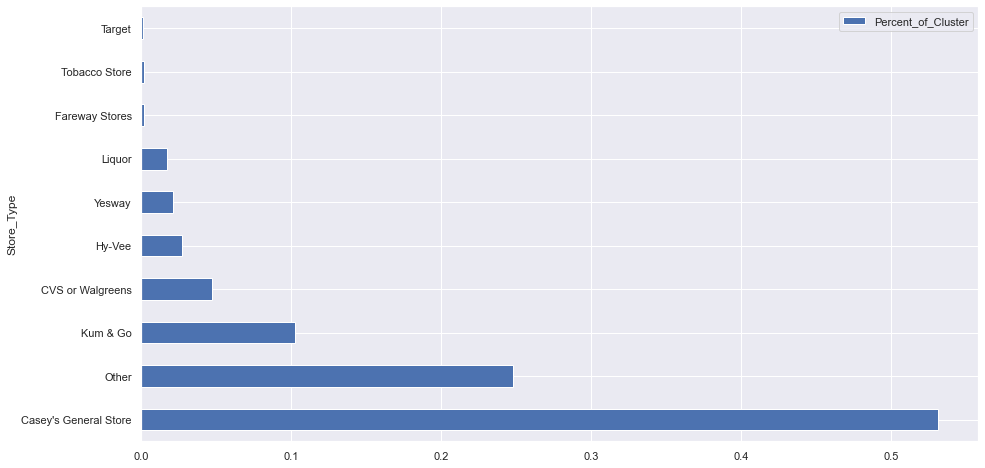

In [113]:
conveniencez_df = convenience.to_frame().reset_index()
conveniencez_df.columns = ['Store_Type','Percent_of_Cluster']
conveniencez_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

<AxesSubplot:ylabel='Store_Type'>

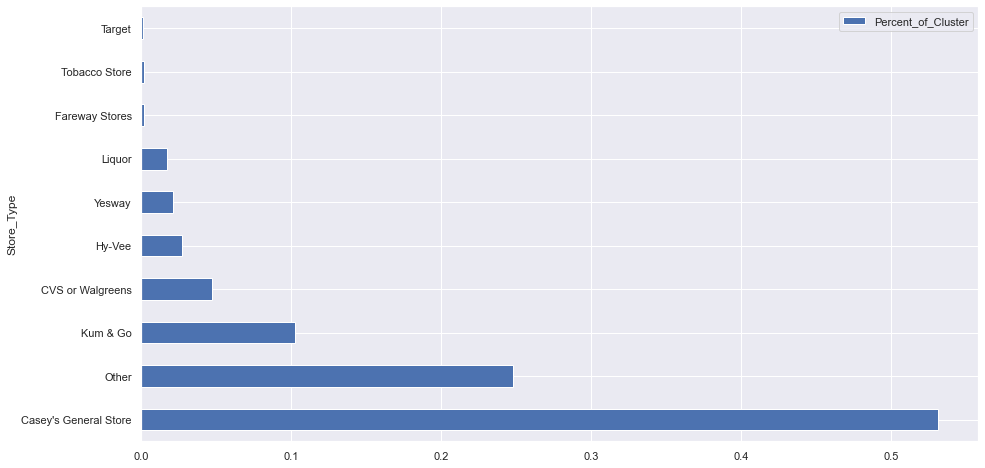

In [114]:
conveniencez_df = convenience.to_frame().reset_index()
conveniencez_df.columns = ['Store_Type','Percent_of_Cluster']
conveniencez_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

<AxesSubplot:ylabel='Store_Type'>

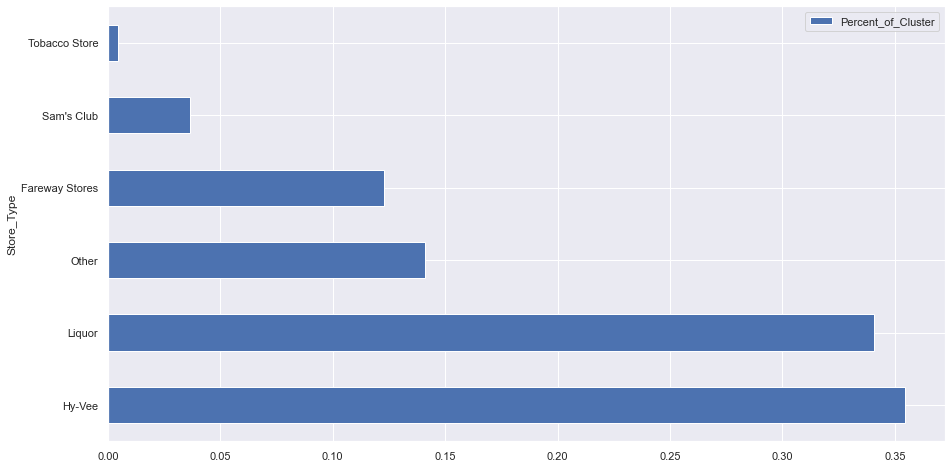

In [115]:
large = stores_clust_info_combined4.loc[stores_clust_info_combined4['Store_Cluster'] == 'Large']['store_type'].value_counts(normalize=True)
large_df = large.to_frame().reset_index()
large_df.columns = ['Store_Type','Percent_of_Cluster']
large_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

<AxesSubplot:ylabel='Store_Type'>

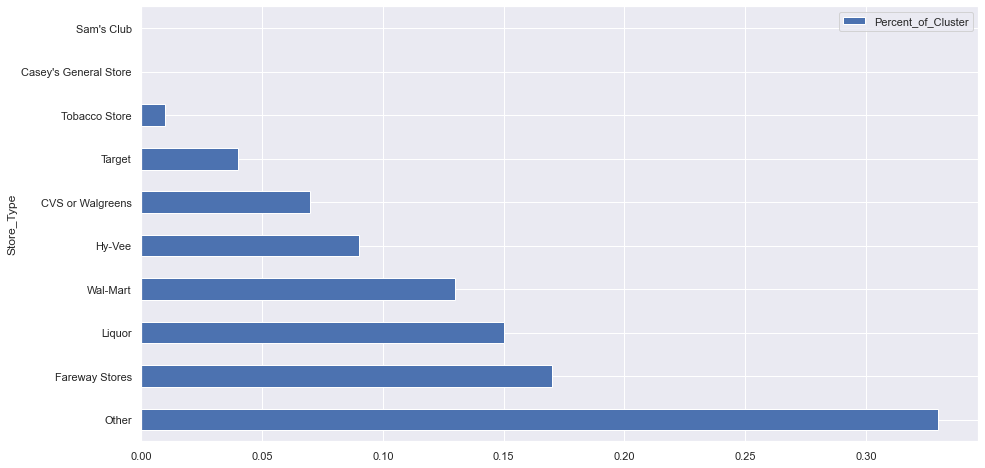

In [116]:
medium = stores_clust_info_combined4.loc[stores_clust_info_combined4['Store_Cluster'] == 'Medium']['store_type'].value_counts(normalize=True).round(2)

medium_df = medium.to_frame().reset_index()
medium_df.columns = ['Store_Type','Percent_of_Cluster']
medium_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

<AxesSubplot:ylabel='Store_Type'>

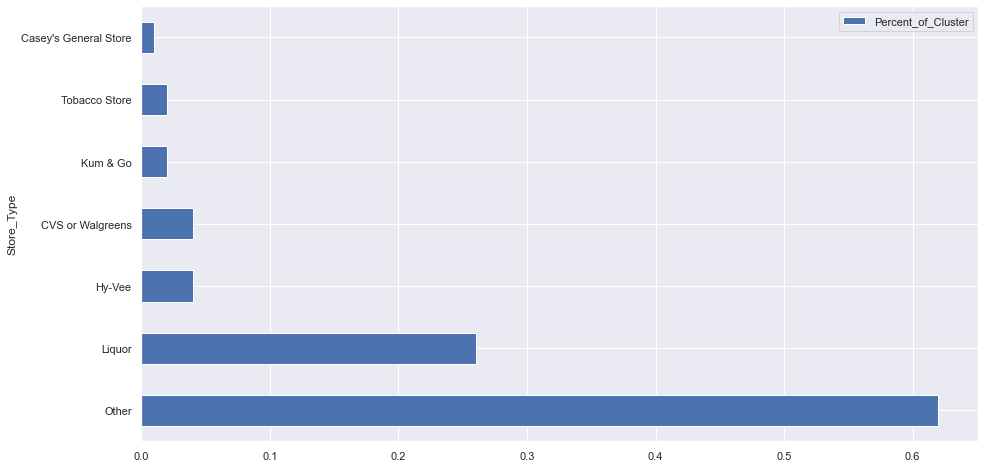

In [117]:
smaller = stores_clust_info_combined4.loc[stores_clust_info_combined4['Store_Cluster'] == 'Smaller']['store_type'].value_counts(normalize=True).round(2)
smaller_df = smaller.to_frame().reset_index()
smaller_df.columns = ['Store_Type','Percent_of_Cluster']
smaller_df.plot.barh(x='Store_Type',y='Percent_of_Cluster')

In [120]:
stores_clust_info_combined4['Convenience'] = stores_clust_info_combined4['label_2' ]  == 0

In [119]:
# label_2 = 1
stores_clust_info_combined4['Large'] = stores_clust_info_combined4['label_2']  == 1
stores_clust_info_combined4['Large'].head()

0    False
1    False
2    False
3    False
4    False
Name: Large, dtype: bool

In [121]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 2
stores_clust_info_combined4['Medium'] = stores_clust_info_combined4['label_2']  == 2
stores_clust_info_combined4['Medium'].head()

0    False
1    False
2    False
3     True
4    False
Name: Medium, dtype: bool

In [122]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 3
stores_clust_info_combined4['Smaller'] = stores_clust_info_combined4['label_2']  == 3
stores_clust_info_combined4['Smaller'].head()

0     True
1     True
2    False
3    False
4     True
Name: Smaller, dtype: bool

In [123]:
stores_clust_info_combined4.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled,label_2,mod_high_lt_1_pct,store_type,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club,Store_Cluster,Convenience,Large,Medium,Smaller
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0,-1.002025381775859,-0.8122862959956105,0.39181712615719755,-0.5567704605715388,1.2312790133159208,0.051810878177559236,-1.1544175283619036,-1.6690385047887228,-0.43810044669216064,-0.4962548677508225,-0.6079823150321451,-2.6868170915983653,-0.6691034944174415,-0.793981224163699,-2.003922544380519,3,True,Liquor,True,False,False,False,False,False,False,Smaller,False,False,False,True
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,-0.9778511389695026,-0.7920318789932395,0.8473994141210379,-0.5567704605715388,0.08062607913097579,-0.502546056237402,0.23785078974146998,-1.5828579001451166,-0.43810044669216064,-0.4962548677508225,-0.6017801563148121,-2.5485730881416297,-0.7735407138087961,-0.6603318837898688,-0.956813180120883,3,True,Other,False,False,False,False,False,False,False,Smaller,False,False,False,True


# write out stores_clust_info_combined4 

In [124]:
stores_clust_info_combined4.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined4__2.csv')

In [125]:
stores_clust_info_combined4.shape

(1925, 71)

In [126]:
outliers_df

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,"1,285,899,061.49",1966,7,3133,22.268733031673253,0.324638081247442,3.4135072234315764,9.142660019813247,49.8945997158261,2.508752787533695,12.447109140474687,10.53303542930099,1.3086498563676987,11.20331950207469,43.18544526013406,6.160229811682094,12.065113309926588,15.544206830513884,6.510681586978636,1.2716174974567651,11.291963377416073,52.54323499491353,2.0854526958290944,11.90233977619532,14.39471007121058,94.11764705882352,15.92356687898089,25.313568985176737,46.97589813551614,97.61904761904762,53.669724770642205,62.33480176211453
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,"4,694,029,900.97",1893,7,11239,21.09936289935725,0.1696255613615633,1.976539401268568,10.92030253096754,43.54052191247561,2.4026483805885923,19.89099931398088,12.687961562416586,0.6940119227689296,6.379571136222085,40.5285167719548,6.47744461251001,12.66126879615624,20.571225197971348,5.916534601162176,2.0073956682514527,12.044374009508717,53.61859482303223,2.060221870047544,9.8256735340729,14.527205493924985,82.35294117647058,24.203821656050955,25.997719498289623,46.157344247385176,92.85714285714286,42.6605504587156,60.57268722466961
1401,4129,Cyclone Liquors,626 Lincoln Way,Ames,50010,POINT (-93.618289 42.022865),85,STORY,Cyclone Liquors,"4,028,389,918.1",1983,7,9923,22.306852041865653,0.297399497902889,3.6357689153159134,13.702351636068652,49.16512047706984,1.0891686495604729,9.80333878221658,11.367529980852565,1.279854882595989,12.738083240955357,51.49652322886224,5.280661090396049,6.066713695455003,11.770633880882798,6.101865859808371,2.4710035300050426,17.95259707513868,54.36207766011094,1.9667170953101365,7.261724659606656,9.88401412002017,88.97058823529412,31.210191082802545,40.59293044469784,49.02228285584357,92.85714285714286,33.02752293577982,43.17180616740088
1405,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,Benz Distributing,"8,451,653,814.22",1823,7,13453,26.98651910532016,0.1955763995230026,2.9792234851876493,10.62478420045028,49.54070606696303,0.2039617341045919,9.469229008451288,17.527688991303055,1.4197576748680591,11.016130231175204,52.8506652791199,7.909016576228351,2.244852449267821,7.031888798037612,4.71749862863412,3.2912781130005486,20.899616017553484,55.62260010970928,1.6456390565002743,8.228195282501371,5.595172792100932,63.23529411764706,38.21656050955414,43.44355758266818,46.1118690313779,71.42857142857143,34.403669724770644,22.46696035242291
1856,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619788 41.605706),77,POLK,"Central City Liquor, Inc.","7,370,230,566.75",2025,7,15428,18.839015207529226,0.5137403498720741,3.97409309189574,10.552697507846933,52.08916007254435,1.6330552383665022,12.39823853194518,11.647653616800625,2.2815659839253306,14.551464869069225,44.62665283899403,6.501166709878143,9.197562872698988,11.193933108633653,5.728395061728396,3.950617283950617,22.17283950617284,50.17283950617284,1.925925925925926,7.358024691358024,8.691358024691358,85.29411764705883,50.955414012738856,51

In [127]:
drops = ['store_revenue_scaled', 'tot_num_unique_items_scaled', 'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled' ,'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled',
'cl_High_End_scaled', 'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled', 'cl_Popular_Bottles_scaled', 
'cl_Quick_Shots_scaled', 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled'] 

In [142]:
stores_clust_info_combined4_2 = stores_clust_info_combined4.drop(columns=drops) #.head(2)
stores_clust_info_combined4_2.shape

(1925, 56)

In [129]:

outliers_df['label_2'] = 9999
outliers_df['label_2'].head() 

1166    9999
1320    9999
1401    9999
1405    9999
1856    9999
Name: label_2, dtype: int64

In [130]:
outliers_df['Store_Cluster'] = 'outlier'
outliers_df['Store_Cluster'].head() 

1166    outlier
1320    outlier
1401    outlier
1405    outlier
1856    outlier
Name: Store_Cluster, dtype: object

In [ ]:
# Convenience 	Large 	Medium 	Smaller

In [131]:
outliers_df['Convenience'] = False
outliers_df['Convenience'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Convenience, dtype: bool

In [132]:
outliers_df['Large'] = False
outliers_df['Large'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Large, dtype: bool

In [133]:
outliers_df['Medium'] = False
outliers_df['Medium'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Medium, dtype: bool

In [134]:
outliers_df['Smaller'] = False
outliers_df['Smaller'].head() 

1166    False
1320    False
1401    False
1405    False
1856    False
Name: Smaller, dtype: bool

In [135]:
stores_clust_info_combined4.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled,label_2,mod_high_lt_1_pct,store_type,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club,Store_Cluster,Convenience,Large,Medium,Smaller
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0,-1.002025381775859,-0.8122862959956105,0.39181712615719755,-0.5567704605715388,1.2312790133159208,0.051810878177559236,-1.1544175283619036,-1.6690385047887228,-0.43810044669216064,-0.4962548677508225,-0.6079823150321451,-2.6868170915983653,-0.6691034944174415,-0.793981224163699,-2.003922544380519,3,True,Liquor,True,False,False,False,False,False,False,Smaller,False,False,False,True
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,-0.9778511389695026,-0.7920318789932395,0.8473994141210379,-0.5567704605715388,0.08062607913097579,-0.502546056237402,0.23785078974146998,-1.5828579001451166,-0.43810044669216064,-0.4962548677508225,-0.6017801563148121,-2.5485730881416297,-0.7735407138087961,-0.6603318837898688,-0.956813180120883,3,True,Other,False,False,False,False,False,False,False,Smaller,False,False,False,True


In [136]:
outliers_df.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,label_2,Store_Cluster,Convenience,Large,Medium,Smaller
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,"1,285,899,061.49",1966,7,3133,22.268733031673253,0.324638081247442,3.4135072234315764,9.142660019813247,49.8945997158261,2.508752787533695,12.447109140474687,10.53303542930099,1.3086498563676987,11.20331950207469,43.18544526013406,6.160229811682094,12.065113309926588,15.544206830513884,6.510681586978636,1.2716174974567651,11.291963377416073,52.54323499491353,2.0854526958290944,11.90233977619532,14.39471007121058,94.11764705882352,15.92356687898089,25.313568985176737,46.97589813551614,97.61904761904762,53.669724770642205,62.33480176211453,9999,outlier,False,False,False,False
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,"4,694,029,900.97",1893,7,11239,21.09936289935725,0.1696255613615633,1.976539401268568,10.92030253096754,43.54052191247561,2.4026483805885923,19.89099931398088,12.687961562416586,0.6940119227689296,6.379571136222085,40.5285167719548,6.47744461251001,12.66126879615624,20.571225197971348,5.916534601162176,2.0073956682514527,12.044374009508717,53.61859482303223,2.060221870047544,9.8256735340729,14.527205493924985,82.35294117647058,24.203821656050955,25.997719498289623,46.157344247385176,92.85714285714286,42.6605504587156,60.57268722466961,9999,outlier,False,False,False,False


In [137]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

In [138]:
type(outliers_df)

pandas.core.frame.DataFrame

In [144]:
# stores_clust_info_combined5 = 
# pd.concat([stores_clust_info_combined4,outliers_df]).head(2)

stores_clust_info_combined5_2 = pd.concat([stores_clust_info_combined4_2,outliers_df])
stores_clust_info_combined5_2.shape

(1930, 56)

In [146]:
stores_clust_info_combined5_2['outler'] = stores_clust_info_combined5_2['Store_Cluster'] == 'outlier'
np.sum(stores_clust_info_combined5_2['outler'])

5

In [147]:
stores_clust_info_combined5_2.head()

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,label_2,mod_high_lt_1_pct,store_type,liquor_or_spirit_or_beer_store,csv_or_walgreens,wal_mart,target,fareway,hy_vee,sams_club,Store_Cluster,Convenience,Large,Medium,Smaller,outler
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,"22,050,030.17",30,4,30,19.88587460513212,0.0,0.0,7.122834471840543,69.2775465712662,3.713744351761129,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,23.33333333333333,0.0,0.0,36.66666666666666,16.666666666666664,23.33333333333333,0.0,5.147058823529411,0.0,0.0,0.5002273760800363,11.904761904761903,1.6055045871559634,0.0,3,True,Liquor,True,False,False,False,False,False,False,Smaller,False,False,False,True,False
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,"48,408,685.66",36,5,36,22.80767234117052,0.0,0.0,3.5187176986453217,61.94238263481082,1.1333202761448409,10.597907049228484,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,25.0,0.0,0.0,33.33333333333333,16.666666666666664,8.333333333333332,16.666666666666664,6.61764705882353,0.0,0.0,0.5457025920873124,14.285714285714285,0.6880733944954129,1.3215859030837005,3,True,Other,False,False,False,False,False,False,False,Smaller,False,False,False,True,False
2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,"24,308,995.32",14,4,14,6.779766330548622,0.0,0.0,0.1961223792773349,86.98117977176855,0.0,6.042931518405508,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,21.428571428571427,0.0,0.0,7.142857142857142,50.0,0.0,21.428571428571427,2.2058823529411766,0.0,0.0,0.045475216007276,16.666666666666664,0.0,0.6607929515418502,0,True,Other,False,False,False,False,False,False,False,Convenience,True,False,False,False,False
3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,"11,723,322.21",33,5,33,24.31773484454967,0.0,0.0,8.17652311204368,27.538225019919505,2.951211131132085,37.01630589235507,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,15.151515151515152,0.0,0.0,30.303030303030305,9.090909090909092,27.27272727272727,18.181818181818183,3.6764705882352944,0.0,0.0,0.4547521600727603,7.142857142857142,2.064220183486239,1.3215859030837005,2,True,Other,False,False,False,False,False,False,False,Medium,False,False,True,False,False
4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,"6,766,721.37",13,4,13,49.1369431101609,0.0,0.0,6.083004124048927,44.51670514106007,0.2633476247301136,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,38.46153846153847,0.0,0.0,30.76923076923077,23.07692307692308,7.6923076923076925,0.0,3.6764705882352944,0.0,0.0,0.1819008640291041,7.142857142857142,0.2293577981651376,0.0,3,True,Other,False,False,False,False,False,False,False,Smaller,False,False,False,True,False


# write out stores_clust_info_combined5

In [ ]:
# stores_clust_info_combined5.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined5__.csv')

In [156]:
# store_counts_df = 
store_counts_df2 = stores_clust_info_combined5_2.groupby(['Zip_Code']).agg({'Store_Number':'count','outler':'sum','Convenience':'sum','Large':'sum','Medium':'sum','Smaller':'sum'}).reset_index()

In [157]:
# df.rename(columns = {"Name": "Names"}, inplace = True)
          

# store_counts_df2.rename(columns = {'Store_Number':'number_of_stores'}, inplace = True)

In [158]:
store_counts_df2.columns

Index(['Zip_Code', 'Store_Number', 'outler', 'Convenience', 'Large', 'Medium',
       'Smaller'],
      dtype='object')

In [160]:
# df.rename(columns = {"Name": "Names"}, 
#           inplace = True)

store_counts_df2.rename(columns = {"outler": "outlier"},inplace = True)

In [162]:
store_counts_df2.columns

Index(['Zip_Code', 'Store_Number', 'outlier', 'Convenience', 'Large', 'Medium',
       'Smaller'],
      dtype='object')

In [163]:
stores_clust_info_combined4.groupby(['Store_Cluster']).agg({'cl_Cheap':'median', 'cl_High_End':'median', 'cl_Moderately_High':'median', 'cl_Most_Variety':'median', 'cl_Popular_Bottles':'median', 'cl_Quick_Shots':'median',
 'cl_Volume_For_Dollar':'median'})


,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
Store_Cluster,,,,,,,
Convenience,25.73529411764705,0.0,0.0,0.8185538881309686,59.523809523809526,2.522935779816514,1.3215859030837005
Large,63.97058823529412,7.32484076433121,10.718358038768528,21.487039563437925,80.95238095238095,20.871559633027523,27.533039647577095
Medium,34.55882352941176,0.6369426751592357,1.3683010262257698,5.547976352887677,54.761904761904766,4.128440366972478,12.995594713656388
Smaller,38.23529411764706,0.6369426751592357,0.9122006841505133,2.2737608003638017,57.14285714285714,11.238532110091745,3.1938325991189425


# write out store_counts_df

In [164]:
store_counts_df2.to_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\store_counts_df2.csv')

### boxplots of clusters

Text(0, 0.5, 'Store Revenue')

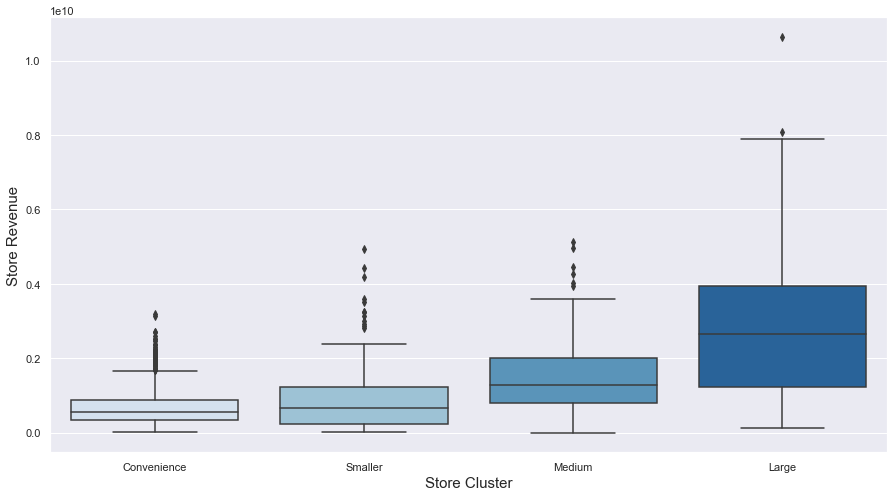

In [165]:
feature = 'store_revenue'


sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues',order=['Convenience','Smaller','Medium','Large'])

box.set_xlabel('Store Cluster',fontsize=15)
box.set_ylabel('Store Revenue',fontsize=15)
                 

# box.set_title(feature,fontsize=20)



In [ ]:
# where do I put my store to make the most money
# don't worry about inventory

In [183]:


def box(feature,ylabel,order=None,ylim=None):

    sns.set(rc = {'figure.figsize':(15,8)})
    box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues',order=order)

    box.set_xlabel('Store Cluster',fontsize=15)
    box.set_ylabel(ylabel,fontsize=15)
    if ylim:
        box.set(ylim=ylim)

# box.set_title(feature,fontsize=20)


In [185]:


def box(feature,ylabel,order=None,ylim=None):

    sns.set(rc = {'figure.figsize':(15,8)})
    box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues',order=order)

    box.set_xlabel('Store Cluster',fontsize=15)
    box.set_ylabel(ylabel,fontsize=15)
    if ylim:
        box.set(ylim=ylim)
                 


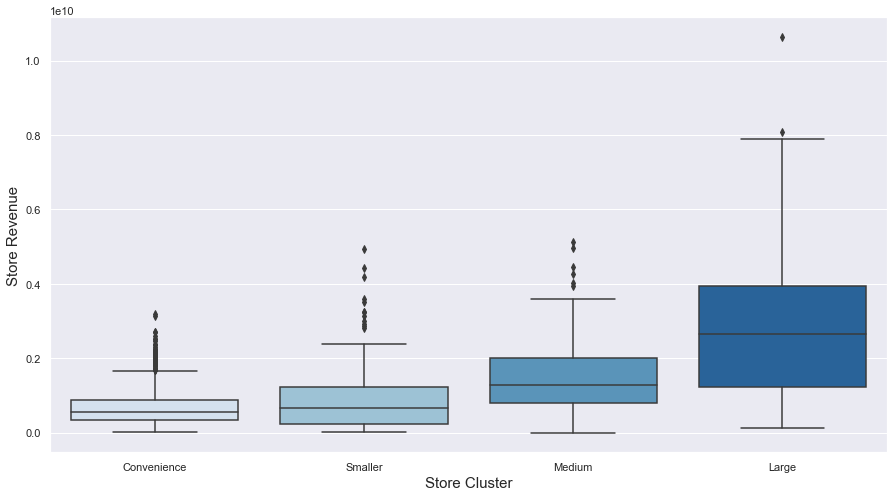

In [188]:
rev_ordr = ['Convenience','Smaller','Medium','Large']

box('store_revenue','Store Revenue',order=rev_ordr)

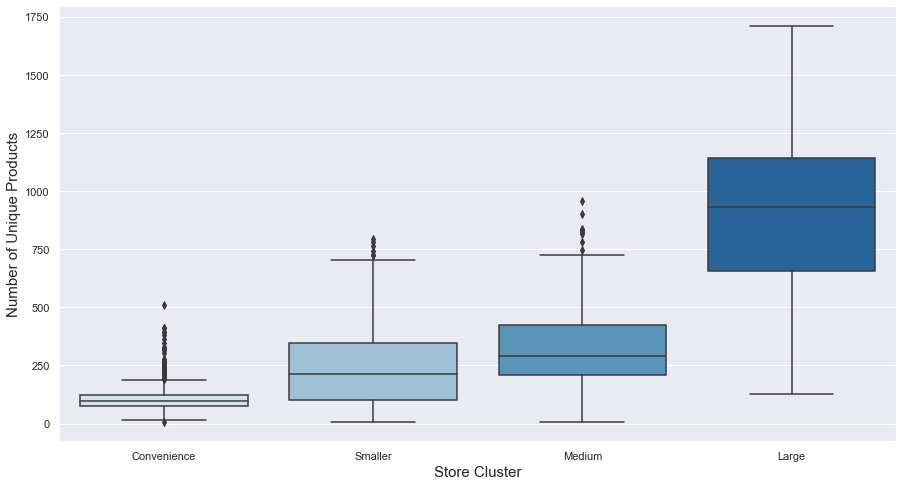

In [186]:
ordr = ['Convenience','Smaller','Medium','Large']
box('tot_num_unique_items','Number of Unique Products',order=ordr)

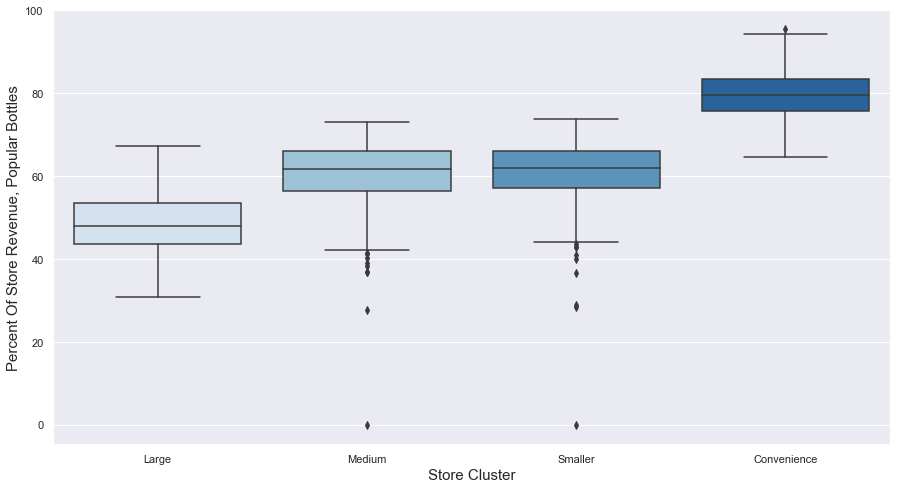

In [192]:
pop_ordr =['Large','Medium','Smaller','Convenience']
box('rev_Popular_Bottles','Percent Of Store Revenue, Popular Bottles',order=pop_ordr)

In [ ]:
def box2(feature,ylabel):

    sns.set(rc = {'figure.figsize':(15,8)})
    box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

    box.set_xlabel('Store Cluster',fontsize=15)
    box.set_ylabel(ylabel,fontsize=15)
    box.set(ylim = (0,100))

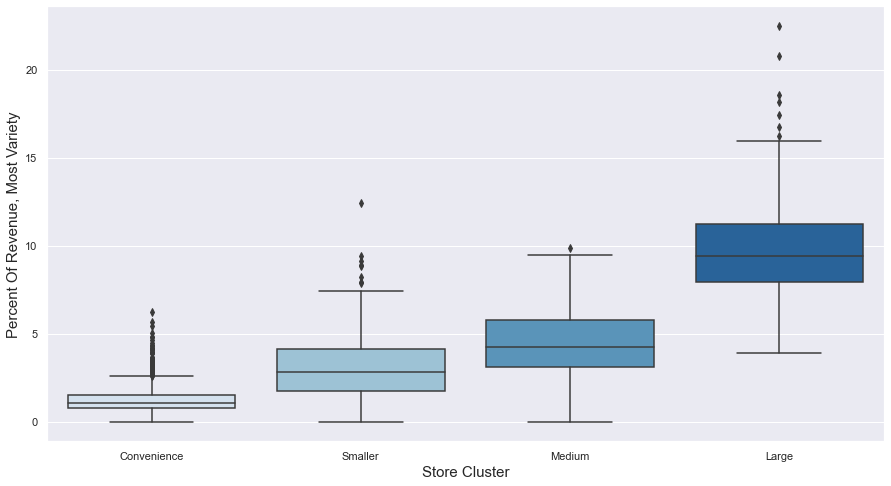

In [194]:
pct_rev =['Convenience','Smaller','Medium','Large']
box('rev_Most_Variety','Percent Of Revenue, Most Variety',order=pct_rev)

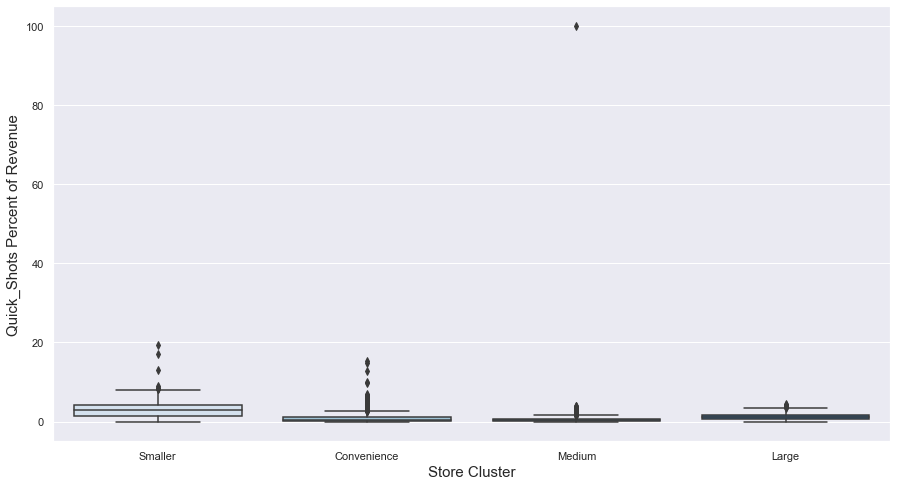

In [195]:
box('rev_Quick_Shots','Quick_Shots Percent of Revenue')

In [ ]:
box2('rev_Volume_For_Dollar','Percent Of Revenue, Volume For Dollar ')

In [ ]:
box2('rev_Moderately_High','Moderately High Percent of Revenue')

In [ ]:
# stores_clust_info_combined4.columns

In [ ]:
box('rev_High_End','High End Percent of Revenue')

In [ ]:
# where do I put my store to make the most money
# don't worry about inventory

In [196]:
# 52245

stores_clust_info_combined4.loc[stores_clust_info_combined4.Zip_Code== '52245',['Store_Cluster','Store_Name','Store_Number','City', 'Zip_Code','County',
                                                                                'tot_num_unique_items','num_unique_clusters',
                                                                              'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
                                                                                 'rev_Most_Variety', 'rev_Popular_Bottles']]


,Store_Cluster,Store_Name,Store_Number,City,Zip_Code,County,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles
956,Convenience,Casey's General Store #3858 - Iowa City,5829,Iowa City,52245,JOHNSON,112,6,13.304467863347403,0.0,0.0295229675040466,0.9544091635958518,82.1937971199718
1323,Large,Hy-Vee Drugstore / Iowa City,2545,Iowa City,52245,JOHNSON,856,7,21.16627784971505,0.0075264107061033,2.197655031430148,11.532061797639198,48.05975583919781


In [197]:
# 50323
stores_clust_info_combined4.loc[stores_clust_info_combined4.Zip_Code== '50323',['Store_Cluster','Store_Name','Store_Number','City', 'Zip_Code','County',
                                                                                'tot_num_unique_items','num_unique_clusters',
                                                                              'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
                                                                                 'rev_Most_Variety', 'rev_Popular_Bottles']]


,Store_Cluster,Store_Name,Store_Number,City,Zip_Code,County,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles
93,Medium,CVS / Pharmacy #10480 / Urbandale,2854,Urbandale,50323,POLK,103,5,14.872400881382603,0.0,0.0,2.256401294145404,66.1551690652773
707,Convenience,Casey's General Store #3210 / Urbandale,4890,Urbandale,50323,POLK,125,5,14.40975147856564,0.0,0.0,0.7527502331333558,81.28831061453077
1407,Convenience,Kum & Go #542 / Urbandale,5058,Urbandale,50323,POLK,123,5,18.598637592557488,0.0,0.0,1.3781697125913566,73.7849450319458
1719,Convenience,Kum & Go #157 / Urbandale,4450,Urbandale,50323,POLK,136,5,20.09948677751551,0.0,0.0,1.3452162872323556,69.23222908486203


In [198]:
# 50023
stores_clust_info_combined4.loc[stores_clust_info_combined4.Zip_Code== '50023',['Store_Cluster','Store_Name','Store_Number','City', 'Zip_Code','County',
                                                                                'tot_num_unique_items','num_unique_clusters',
                                                                              'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
                                                                                 'rev_Most_Variety', 'rev_Popular_Bottles']]


,Store_Cluster,Store_Name,Store_Number,City,Zip_Code,County,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles
108,Medium,CVS Pharmacy #10114 / Ankeny,2848,Ankeny,50023,POLK,69,6,6.7195898905948335,0.0,0.1730650856001138,3.1268851163584674,64.4210056685344
390,Convenience,Hy-Vee C-Store #2 - Ankeny,2699,Ankeny,50023,Polk,25,3,10.57783444508916,0.0,0.0,0.0,88.15273398976437
577,Convenience,Casey's General Store #2164 / Ankeny,5099,Ankeny,50023,Polk,116,6,14.779699144370204,0.0,0.0146962211135234,0.8021243406621916,81.75565779649804
993,Smaller,Hy-Vee Gas #1 / Ankeny,2702,Ankeny,50023,Polk,52,5,22.01785293685573,0.0,0.1576102969961561,3.488010912960576,68.28299276229444
1228,Convenience,Casey's General Store #3827- Ankeny,5845,Ankeny,50023,Polk,154,6,12.753181831683452,0.0,0.1121796446179539,1.4469255504392784,83.01433744804444
1241,Large,Hy-Vee Food Store #2 / State Ankeny,2666,Ankeny,50023,POLK,1395,7,19.5432216557575,0.1260337480816879,2.681271553558231,11.332269447356056,43.096277528305095
1242,Convenience,Casey's General Store #1659 / Ankeny,5877,Ankeny,50023,Polk,92,6,11.828476995784737,0.0,0.0049879826416378,0.5993074747950885,86.28719087383732
1264,Convenience,Casey's General Store #2689 / Ankeny,5565,Ankeny,50023,POLK,184,6,14.616905347928457,0.0,0.0034135575267797,1.561593675032091,80.50462192637887
1285,Convenience,Kum & Go #579 / Ankeny,4609,Ankeny,50023,POLK,100,5,15.949780393017605,0.0,0.0,1.1151398506220802,75.20397276396096
1298,Large,Fareway Stores #061 / Ankeny,4084,Ankeny,50023,POLK,310,7,19.34895379565461,0.0077937817403513,1.1893066948487503,9.653604982316777,42.29451094986581
